In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, time
import matplotlib.pyplot as plt
#from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
import os

# don't need if using your data
import keras
#from keras.applications import VGG19
#from keras.applications.vgg19 import preprocess_input
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers


Using TensorFlow backend.


In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
X_train = pd.read_pickle( './drive/My Drive/Train.pkl')
y_train = np.genfromtxt('./drive/My Drive/TrainLabels.csv', delimiter=',')
X_test = pd.read_pickle('./drive/My Drive/Test.pkl')

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.0, random_state=13) # trainign and validation
#X_train.shape
#x_train, y_train = X, y
#plt.imshow(X_train[0])



(60000, 64, 128)


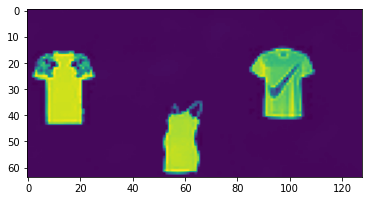

In [ ]:
print(X_train.shape)
plt.imshow(X_train[1])

In [ ]:
# Each image's dimension is 32 x 32
from keras.preprocessing.image import img_to_array, array_to_img

img_rows, img_cols = 64, 128
img_rows_new, img_cols_new = 64, 128 # 64, 64 -> increase/decrease 
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = np.stack([X_train]*3, axis=-1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
#X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((img_rows_new,img_cols_new))) for im in X_train]) 
X_train = X_train.astype('float32')
X_train /= 255.0

# Prepare the test images
X_test = np.stack([X_test]*3, axis=-1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
#X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((img_rows_new,img_cols_new))) for im in X_test]) 
X_test = X_test.astype('float32')
X_test /= 255.0

In [ ]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
y_train = to_categorical(y_train)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=20,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 15s 306us/step - loss: 1.2302 - acc: 0.5155 - val_loss: 12.9861 - val_acc: 0.0000e+00
Epoch 2/20
48000/48000 [==============================] - 14s 291us/step - loss: 0.8061 - acc: 0.6870 - val_loss: 13.8872 - val_acc: 0.0000e+00
Epoch 3/20
48000/48000 [==============================] - 14s 290us/step - loss: 0.6062 - acc: 0.7660 - val_loss: 14.5550 - val_acc: 0.0000e+00
Epoch 4/20
48000/48000 [==============================] - 14s 288us/step - loss: 0.4104 - acc: 0.8464 - val_loss: 15.5120 - val_acc: 0.0000e+00
Epoch 5/20
48000/48000 [==============================] - 14s 289us/step - loss: 0.1989 - acc: 0.9297 - val_loss: 15.8708 - val_acc: 0.0000e+00
Epoch 6/20
48000/48000 [==============================] - 14s 289us/step - loss: 0.0689 - acc: 0.9791 - val_loss: 16.0981 - val_acc: 0.0000e+00
Epoch 7/20
48000/48000 [==============================] - 14s 287us/step - loss: 0.043

In [ ]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
y_train = to_categorical(y_train)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',  # 32，(3,3)是卷积核数量和大小
                 input_shape=(img_rows, img_cols, 3)))  # 第一层需要指出图像的大小
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
pre = model.predict_classes(X_test)

In [ ]:
import numpy as np
np.savetxt('ExampleSubmissionRandom.csv', pre, delimiter = ',')

In [ ]:
from google.colab import files
files.download('ExampleSubmissionRandom.csv')

In [ ]:
import keras
#from keras.applications import VGG19
#from keras.applications.vgg19 import preprocess_input
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# Create the base model of VGG19
vgg19 = ResNet50(weights='imagenet', include_top=False, input_shape = (img_rows_new, img_cols_new, 3), classes = 10) 


# Preprocessing the input 
X_train = preprocess_input(X_train)
#X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)
#val_features = vgg19.predict(np.array(X_val), batch_size=256, verbose=1)


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


10000/10000 [==============================] - 5s 468us/step


In [ ]:
# Flatten extracted features
train_features = np.reshape(train_features, (60000, 4*4*1024))
test_features = np.reshape(test_features, (10000, 4*4*1024))
#val_features = np.reshape(val_features, (12000, 4*4*1024))

In [ ]:

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_dim=4 * 4 * 1024))
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dropout(0.25))
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:

vgg = VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(img_rows_new, img_cols_new, 3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
output = Dense(10, activation='softmax')(output)

vgg_model = Model(vgg.input, output)

vgg_model.trainable = True
for layer in vgg_model.layers[:6]:
    layer.trainable = False
vgg_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
y = to_categorical(np.array(y_train))


In [ ]:
# Train the the model
history = model.fit(
    train_features,
    y,
    epochs=50
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
60000/60000 [==============================] - 31s 519us/step - loss: 1.8112 - acc: 0.2886
Epoch 2/50
60000/60000 [==============================] - 30s 495us/step - loss: 1.6180 - acc: 0.3680
Epoch 3/50
60000/60000 [==============================] - 30s 494us/step - loss: 1.5526 - acc: 0.3934
Epoch 4/50
60000/60000 [==============================] - 30s 492us/step - loss: 1.5146 - acc: 0.4105
Epoch 5/50
60000/60000 [==============================] - 30s 493us/step - loss: 1.4881 - acc: 0.4218
Epoch 6/50
60000/60000 [==============================] - 30s 501us/step - loss: 1.4613 - acc: 0.4348
Epoch 7/50
60000/60000 [==============================] - 30s 497us/step - loss: 1.4390 - acc: 0.4424
Epoch 8/50
60000/60000 [==============================] - 30s 496us/step - loss: 1.4200 - acc: 0.4531
Epoch 9/50
41728/60000 [===================>..........] - ETA: 9s - loss: 1.3998 - acc: 

KeyboardInterrupt: ignored

In [ ]:
prediction = model.predict_classes(test_features)

In [ ]:
prediction

array([0, 8, 8, ..., 8, 2, 8])

In [ ]:
prediction_df = pd.DataFrame(index = None)
prediction_df["id"] = [i for i in range(0, len(prediction))]
prediction_df["output"] = prediction
prediction_df.to_csv("submission.csv",index=False )

In [ ]:

model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(x_val, y_val),shuffle=True,verbose=1)